In [214]:
import pandas as pd
import numpy as np
import csv
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import optimizers, callbacks

In [215]:
#Read csv data file and store in dataframe
data=pd.read_csv('UpdatedTorontoWeather.csv') 

In [216]:
#take a look at the available columns
data.columns

Index(['month', 'day', 'year', 'date', 'day_of_year', 'max_dew_point_v',
       'max_min_temperature_v', 'max_temperature_v', 'max_wind_gust_v',
       'max_wind_speed_v', 'min_dew_point_v', 'min_max_temperature_v',
       'min_relative_humidity_v', 'min_temperature_v', 'min_windchill_v',
       'precipitation_v', 'rain_v', 'snow_v', 'snow_on_ground_v'],
      dtype='object')

In [217]:
data

,month,day,year,date,day_of_year,max_dew_point_v,max_min_temperature_v,max_temperature_v,max_wind_gust_v,max_wind_speed_v,min_dew_point_v,min_max_temperature_v,min_relative_humidity_v,min_temperature_v,min_windchill_v,precipitation_v,rain_v,snow_v,snow_on_ground_v
0,4,7,2021,2021-04-07,97,14.0,15.6,27.6,87,57,-20.0,-5.0,18,-17.2,-25.0,15.2,14.4,14.0,12
1,4,6,2021,2021-04-06,96,13.3,10.3,22.5,111,81,-15.6,-4.0,20,-11.7,-20.0,28.2,27.8,10.4,13
2,4,5,2021,2021-04-05,95,10.9,9.9,23.1,96,58,-17.8,-2.1,24,-9.4,-20.0,22.1,22.1,2.0,13
3,4,4,2021,2021-04-04,94,13.9,12.0,23.1,103,77,-19.4,-4.4,21,-11.7,-19.0,18.0,18.0,7.5,13
4,4,3,2021,2021-04-03,93,14.4,7.2,22.2,85,60,-21.1,-3.3,26,-12.2,-21.0,40.2,40.2,17.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,17,2018,2018-07-17,198,24.1,24.1,36.8,98,61,2.9,21.1,22,6.1,NaN,31.8,31.8,0.0,0
996,7,16,2018,2018-07-16,197,23.9,23.8,34.7,63,37,5.6,21.1,27,7.2,NaN,25.9,25.9,0.0,0
997,7,15,2018,2018-07-15,196,26.6,22.3,35.7,74,59,3.5,17.2,27,6.7,NaN,40.5,40.5,0.0,0
998,7,14,2018,2018-07-14,195,26.4,23.6,36.8,85,48,0.1,16.1,24,7.8,NaN,32.5,32.5,0.0,0


In [218]:
data=data.drop(['month', 'day','year','day_of_year','min_windchill_v'], axis=1)

In [219]:
data.dtypes

date                        object
max_dew_point_v            float64
max_min_temperature_v      float64
max_temperature_v          float64
max_wind_gust_v              int64
max_wind_speed_v             int64
min_dew_point_v            float64
min_max_temperature_v      float64
min_relative_humidity_v      int64
min_temperature_v          float64
precipitation_v            float64
rain_v                     float64
snow_v                     float64
snow_on_ground_v             int64
dtype: object

<AxesSubplot:xlabel='date'>

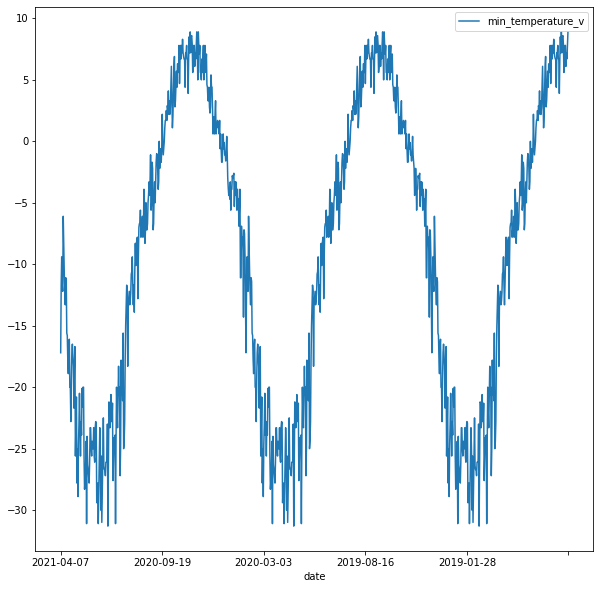

In [220]:
data.plot(x='date', y='min_temperature_v',figsize=(10,10))


In [221]:
data_training = data[data['date']<'2021-01-01'].copy()
data_testing = data[data['date']>='2021-01-01'].copy()


In [222]:
data_training=data_training.drop(['date'], axis=1)

In [223]:
data_training

,max_dew_point_v,max_min_temperature_v,max_temperature_v,max_wind_gust_v,max_wind_speed_v,min_dew_point_v,min_max_temperature_v,min_relative_humidity_v,min_temperature_v,precipitation_v,rain_v,snow_v,snow_on_ground_v
97,11.7,4.4,13.9,71,56,-27.2,-14.5,45,-23.3,22.7,22.7,13.0,20
98,6.6,3.3,10.2,80,59,-26.7,-11.7,38,-22.8,17.8,12.2,19.6,23
99,13.3,6.0,14.6,85,59,-20.8,-10.0,47,-20.6,32.5,32.5,7.0,25
100,13.2,2.7,17.2,104,76,-26.4,-12.5,49,-22.5,27.7,11.8,16.3,25
101,10.6,2.6,14.2,74,50,-23.8,-11.3,47,-22.8,38.4,38.4,10.9,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24.1,24.1,36.8,98,61,2.9,21.1,22,6.1,31.8,31.8,0.0,0
996,23.9,23.8,34.7,63,37,5.6,21.1,27,7.2,25.9,25.9,0.0,0
997,26.6,22.3,35.7,74,59,3.5,17.2,27,6.7,40.5,40.5,0.0,0
998,26.4,23.6,36.8,85,48,0.1,16.1,24,7.8,32.5,32.5,0.0,0


In [224]:
df['max_temperature_v'].min()

7.2

In [225]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(data_training)


In [226]:
X_train=[]
y_train=[]
for i in range (60, training_data.shape[0]):
    X_train.append(training_data[i-60:i]) #0 to 59
    y_train.append(training_data[i, 2]) #predict Open price for 60th data

In [227]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [228]:
X_train.shape,y_train.shape

((843, 60, 13), (843,))

In [229]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],13)))
regressor.add(Dropout(0.2))#20% of neurons will be randomly dropped

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3)) 

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4)) 

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5)) 

regressor.add(Dense(units = 1))

In [230]:
regressor.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 60, 50)            12800     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_29 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 120)              

In [231]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Early stop factors to avoid overfitting: Learning rate set at 3% & loss delta set to 0
early_stopping = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=1, mode='auto')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=8, min_lr=0.03, verbose=1) #rate at which model learns
history=regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
27/27 [==============================] - 7s 94ms/step - loss: 0.2295
Epoch 2/500
27/27 [==============================] - 3s 93ms/step - loss: 0.0381
Epoch 3/500
27/27 [==============================] - 3s 97ms/step - loss: 0.0214
Epoch 4/500
27/27 [==============================] - 2s 91ms/step - loss: 0.0197
Epoch 5/500
27/27 [==============================] - 2s 90ms/step - loss: 0.0160
Epoch 6/500
27/27 [==============================] - 2s 92ms/step - loss: 0.0150
Epoch 7/500
27/27 [==============================] - 2s 90ms/step - loss: 0.0150
Epoch 8/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0153
Epoch 9/500
27/27 [==============================] - 2s 91ms/step - loss: 0.0130
Epoch 10/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0136
Epoch 11/500
27/27 [==============================] - 2s 90ms/step - loss: 0.0145
Epoch 12/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0119
Epoch 13/500
27/27 [=====

27/27 [==============================] - 2s 88ms/step - loss: 0.0059
Epoch 101/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0060
Epoch 102/500
27/27 [==============================] - 2s 86ms/step - loss: 0.0060
Epoch 103/500
27/27 [==============================] - 2s 89ms/step - loss: 0.0055
Epoch 104/500
27/27 [==============================] - 2s 87ms/step - loss: 0.0055
Epoch 105/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0053
Epoch 106/500
27/27 [==============================] - 2s 85ms/step - loss: 0.0058
Epoch 107/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0055
Epoch 108/500
27/27 [==============================] - 2s 91ms/step - loss: 0.0064
Epoch 109/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0055
Epoch 110/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0056
Epoch 111/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0049
Epoch 112/500
27/2

27/27 [==============================] - 2s 84ms/step - loss: 0.0048
Epoch 199/500
27/27 [==============================] - 2s 83ms/step - loss: 0.0045
Epoch 200/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0049
Epoch 201/500
27/27 [==============================] - 2s 82ms/step - loss: 0.0048
Epoch 202/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0048
Epoch 203/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0050
Epoch 204/500
27/27 [==============================] - 2s 82ms/step - loss: 0.0051
Epoch 205/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0046
Epoch 206/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0051
Epoch 207/500
27/27 [==============================] - 3s 93ms/step - loss: 0.0055
Epoch 208/500
27/27 [==============================] - 2s 87ms/step - loss: 0.0050
Epoch 209/500
27/27 [==============================] - 2s 93ms/step - loss: 0.0046
Epoch 210/500
27/2

27/27 [==============================] - 3s 97ms/step - loss: 0.0051
Epoch 297/500
27/27 [==============================] - 2s 87ms/step - loss: 0.0048
Epoch 298/500
27/27 [==============================] - 2s 82ms/step - loss: 0.0045
Epoch 299/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0044
Epoch 300/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0047
Epoch 301/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0047
Epoch 302/500
27/27 [==============================] - 2s 83ms/step - loss: 0.0051
Epoch 303/500
27/27 [==============================] - 2s 85ms/step - loss: 0.0044
Epoch 304/500
27/27 [==============================] - 2s 85ms/step - loss: 0.0048
Epoch 305/500
27/27 [==============================] - 2s 86ms/step - loss: 0.0055
Epoch 306/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0046
Epoch 307/500
27/27 [==============================] - 2s 90ms/step - loss: 0.0050
Epoch 308/500
27/2

27/27 [==============================] - 2s 87ms/step - loss: 0.0048
Epoch 395/500
27/27 [==============================] - 2s 83ms/step - loss: 0.0045
Epoch 396/500
27/27 [==============================] - 2s 83ms/step - loss: 0.0039
Epoch 397/500
27/27 [==============================] - 2s 83ms/step - loss: 0.0048
Epoch 398/500
27/27 [==============================] - 2s 87ms/step - loss: 0.0046
Epoch 399/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0044
Epoch 400/500
27/27 [==============================] - 2s 85ms/step - loss: 0.0042
Epoch 401/500
27/27 [==============================] - 2s 85ms/step - loss: 0.0046
Epoch 402/500
27/27 [==============================] - 2s 88ms/step - loss: 0.0043
Epoch 403/500
27/27 [==============================] - 2s 83ms/step - loss: 0.0049
Epoch 404/500
27/27 [==============================] - 2s 84ms/step - loss: 0.0051
Epoch 405/500
27/27 [==============================] - 2s 86ms/step - loss: 0.0040
Epoch 406/500
27/2

27/27 [==============================] - 2s 71ms/step - loss: 0.0044
Epoch 493/500
27/27 [==============================] - 2s 70ms/step - loss: 0.0044
Epoch 494/500
27/27 [==============================] - 2s 69ms/step - loss: 0.0040
Epoch 495/500
27/27 [==============================] - 2s 69ms/step - loss: 0.0041
Epoch 496/500
27/27 [==============================] - 2s 69ms/step - loss: 0.0044
Epoch 497/500
27/27 [==============================] - 2s 70ms/step - loss: 0.0039
Epoch 498/500
27/27 [==============================] - 2s 70ms/step - loss: 0.0043
Epoch 499/500
27/27 [==============================] - 2s 70ms/step - loss: 0.0046
Epoch 500/500
27/27 [==============================] - 2s 68ms/step - loss: 0.0037


In [232]:
past_60_days = data_training.head (60)
df = past_60_days.append(data_testing, ignore_index = True)
df=df.drop(['date'], axis=1)

In [233]:
inputs = scaler.fit_transform(df)
inputs.shape

(157, 13)

In [234]:
X_test = []
y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 2])

In [235]:
df

,max_dew_point_v,max_min_temperature_v,max_temperature_v,max_wind_gust_v,max_wind_speed_v,min_dew_point_v,min_max_temperature_v,min_relative_humidity_v,min_temperature_v,precipitation_v,rain_v,snow_v,snow_on_ground_v
0,11.7,4.4,13.9,71,56,-27.2,-14.5,45,-23.3,22.7,22.7,13.0,20
1,6.6,3.3,10.2,80,59,-26.7,-11.7,38,-22.8,17.8,12.2,19.6,23
2,13.3,6.0,14.6,85,59,-20.8,-10.0,47,-20.6,32.5,32.5,7.0,25
3,13.2,2.7,17.2,104,76,-26.4,-12.5,49,-22.5,27.7,11.8,16.3,25
4,10.6,2.6,14.2,74,50,-23.8,-11.3,47,-22.8,38.4,38.4,10.9,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,9.7,7.4,11.1,81,58,-26.7,-15.0,30,-23.0,16.5,12.2,16.5,20
153,9.7,7.3,12.0,89,59,-34.2,-14.1,40,-31.3,17.7,17.7,8.9,20
154,11.6,4.8,13.9,72,52,-30.3,-19.7,38,-26.0,27.9,15.8,27.9,21
155,9.4,1.1,12.2,70,50,-26.1,-15.2,40,-21.2,16.4,16.4,16.3,25


In [236]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((97, 60, 13), (97,))

In [237]:
prediction = regressor.predict(X_test)
test_error_rate = regressor.evaluate(X_test, y_test)
test_error_rate

4/4 [==============================] - 2s 17ms/step - loss: 0.0156


0.015631215646862984

In [238]:
scaler.scale_

array([0.078125  , 0.06666667, 0.04901961, 0.01666667, 0.01886792,
       0.03676471, 0.04115226, 0.02857143, 0.03968254, 0.01312336,
       0.01222494, 0.02538071, 0.01492537])

In [239]:
prediction = prediction/0.03215434
y_test = y_test/0.03215434


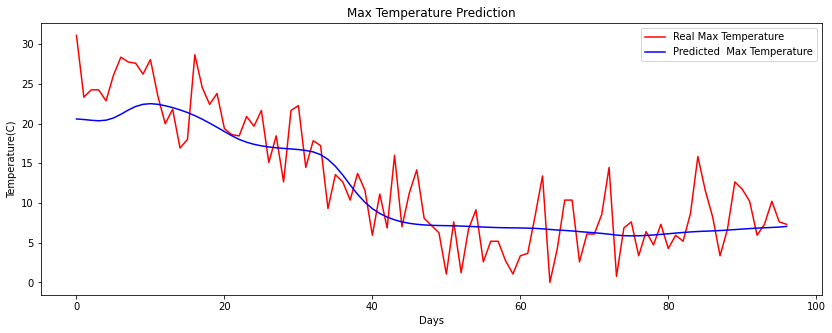

In [240]:
# Visualize Results

plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real Max Temperature')
plt.plot(prediction, color = 'blue', label = 'Predicted  Max Temperature')
plt.title('Max Temperature Prediction')
plt.xlabel('Days')
plt.ylabel('Temperature(C)')
plt.legend()
plt.show()

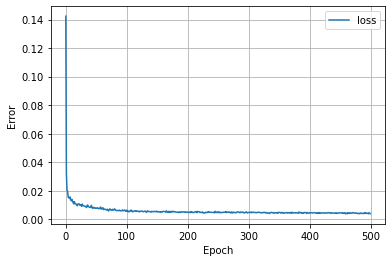

In [241]:
#Plots the error loss for both the loss and the validation loss for each epoch
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)